In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Importação dos Dados

In [2]:
base_titanic = pd.read_csv('./data/train.csv')
test_titanic = pd.read_csv('./data/test.csv')
test_titanic_y = pd.read_csv('./data/gender_submission.csv')

In [3]:
base_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test_titanic

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# Visualização dos dados

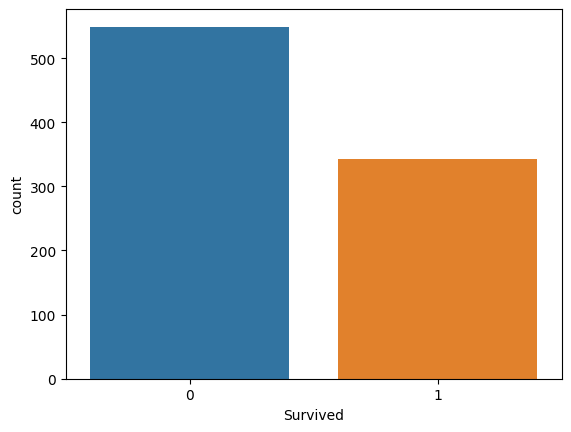

In [5]:
sns.countplot(x=base_titanic['Survived']);
# Pode ser que seja levemente tendencioso para valores de não sobreviventes

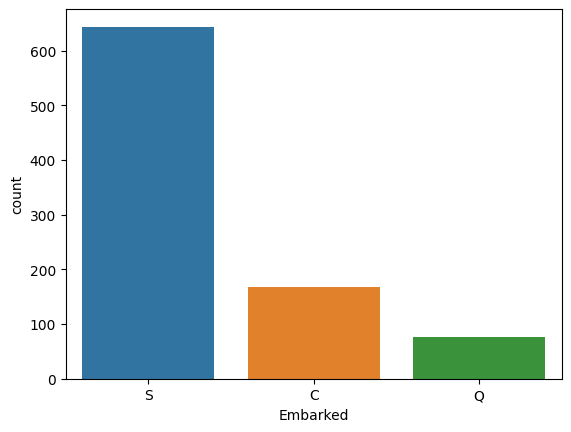

In [6]:
sns.countplot(x=base_titanic['Embarked']);

In [230]:
# Total de valor null
null_base_titanic = base_titanic.isnull().sum()
null_base_titanic

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [231]:
# Porcentagem de valores null
round(100*(base_titanic.isnull().sum()/len(base_titanic.index)), 2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [232]:
test_titanic.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [233]:
round(100*(test_titanic.isnull().sum()/len(test_titanic.index)), 2)

PassengerId     0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            20.57
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.24
Cabin          78.23
Embarked        0.00
dtype: float64

# Tratamento dos dados

In [18]:
# Atualizando os valores de Age null para a média
# Train
avarage = base_titanic['Age'].mean()
base_titanic['Age'].fillna(avarage, inplace=True)
# Test
avarage_test = test_titanic['Age'].mean()
test_titanic['Age'].fillna(avarage_test, inplace=True)


avarage_test_fare = test_titanic['Fare'].mean()
test_titanic['Fare'].fillna(avarage_test_fare, inplace=True)

In [235]:
# Atualizando os valores de Cabin
# Train
base_titanic['Cabin'] = base_titanic['Cabin'].fillna(0) # NaN to 0
base_titanic.loc[base_titanic['Cabin'] != 0, 'Cabin'] = 1 # Other values to 1
# base_titanic['Cabin']
# Test
test_titanic['Cabin'] = test_titanic['Cabin'].fillna(0) # NaN to 0
test_titanic.loc[test_titanic['Cabin'] != 0, 'Cabin'] = 1 # Other values to 1
# test_titanic['Cabin']

In [236]:
base_titanic['Embarked'].fillna('S', inplace=True)

In [15]:
# Label encoder Sex field -> male: 1, female: 0
label_encoder_Sex = LabelEncoder()
base_titanic['Sex'] = label_encoder_Sex.fit_transform(base_titanic['Sex'])

test_titanic['Sex'] = label_encoder_Sex.fit_transform(test_titanic['Sex'])

In [17]:
# Label encoder Embarked field -> S:2 C:0 Q:1
label_encoder_Embarked = LabelEncoder()
base_titanic['Embarked'] = label_encoder_Embarked.fit_transform(base_titanic['Embarked'])

test_titanic['Embarked'] = label_encoder_Embarked.fit_transform(test_titanic['Embarked'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,0


In [239]:
base_titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [240]:
base_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,1,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,1,1
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,0,1
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,1,2


In [241]:
test_titanic.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Treinamento e Test

In [242]:

columns_to_use = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']
X_titanic_train = base_titanic[columns_to_use]
y_titanic_train = base_titanic['Survived']

X_titanic_test = test_titanic[columns_to_use]
y_titanic_test = test_titanic_y['Survived']

In [243]:
with open('data/titanic.pkl', mode='wb') as f:
   pickle.dump([X_titanic_train, y_titanic_train, X_titanic_test, y_titanic_test], f)